In [23]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [24]:
sc = StatsCan()

In [25]:
df = sc.table_to_df('14-10-0294-02')
sc.update_tables()


['14100017', '14100050', '14100097', '14100294']

In [26]:
df = sc.table_to_df('14-10-0294-02')


In [27]:
df

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-03-01,Canada,2016A000011124,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445764,1.1.1.1,24281.3,NaN,NaN,NaN,1
1,2001-03-01,Canada,2016A000011124,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91445765,1.1.1.2,24281.3,NaN,NaN,NaN,1
2,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445766,1.2.1.1,16010.7,NaN,NaN,NaN,1
3,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91445767,1.2.1.2,15758.5,NaN,NaN,NaN,1
4,2001-03-01,Canada,2016A000011124,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896490,1.2.2.1,33.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342971,2020-07-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446406,46.7.1.1,56.2,NaN,NaN,NaN,1
342972,2020-07-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446407,46.7.1.2,56.8,NaN,NaN,NaN,1
342973,2020-07-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897315,46.7.2.1,1.7,NaN,NaN,NaN,1
342974,2020-07-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897316,46.7.3.1,0.6,NaN,NaN,NaN,1


In [28]:
calgary = df[df['GEO']=="Calgary, Alberta"]

In [29]:
calgary

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1252,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101897192,40.2.2.1,8.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342779,2020-07-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,59.5,NaN,NaN,NaN,1
342780,2020-07-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446323,40.7.1.2,60.3,NaN,NaN,NaN,1
342781,2020-07-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897207,40.7.2.1,1.1,NaN,NaN,NaN,1
342782,2020-07-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897208,40.7.3.1,0.4,NaN,NaN,NaN,1


In [30]:
calgary['Statistics'].unique()

[Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]
Categories (4, object): [Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]

In [31]:
cal_est = calgary[calgary['Statistics']=='Estimate']

In [32]:
cal_est

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1255,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446314,40.3.1.1,546.7,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342770,2020-07-01,"Calgary, Alberta",2011S0503825,Unemployment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446319,40.5.1.2,15.3,NaN,NaN,NaN,1
342774,2020-07-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446320,40.6.1.1,70.4,NaN,NaN,NaN,1
342775,2020-07-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Unadjusted,Percentage,242,units,0,v91446321,40.6.1.2,71.1,NaN,NaN,NaN,1
342779,2020-07-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,59.5,NaN,NaN,NaN,1


In [33]:
#filter out non relevant information
cal_est = cal_est.filter(items = ['REF_DATE','Labour force characteristics','Data type','UOM', 'VALUE'])

In [34]:
cal_est

,REF_DATE,Labour force characteristics,Data type,UOM,VALUE
1248,2001-03-01,Population,Seasonally adjusted,Persons,769.0
1249,2001-03-01,Population,Unadjusted,Persons,769.0
1250,2001-03-01,Labour force,Seasonally adjusted,Persons,575.1
1251,2001-03-01,Labour force,Unadjusted,Persons,567.5
1255,2001-03-01,Employment,Seasonally adjusted,Persons,546.7
...,...,...,...,...,...
342770,2020-07-01,Unemployment rate,Unadjusted,Percentage,15.3
342774,2020-07-01,Participation rate,Seasonally adjusted,Percentage,70.4
342775,2020-07-01,Participation rate,Unadjusted,Percentage,71.1
342779,2020-07-01,Employment rate,Seasonally adjusted,Percentage,59.5


In [35]:
cal_unadj = cal_est[(cal_est['UOM']=='Persons') & (cal_est['Data type']=='Unadjusted')]

In [36]:
cal_pivot = cal_unadj.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')
cal_pivot

Labour force characteristics,Population,Labour force,Employment,Unemployment
REF_DATE,,,,
2001-03-01,769.0,567.5,540.0,27.5
2001-04-01,771.1,570.8,544.3,26.5
2001-05-01,773.2,577.3,552.4,24.9
2001-06-01,775.4,588.7,565.0,23.7
2001-07-01,777.6,599.3,572.8,26.5
...,...,...,...,...
2020-03-01,1292.8,905.0,824.1,80.9
2020-04-01,1295.0,881.9,785.6,96.3
2020-05-01,1297.1,874.3,757.9,116.4


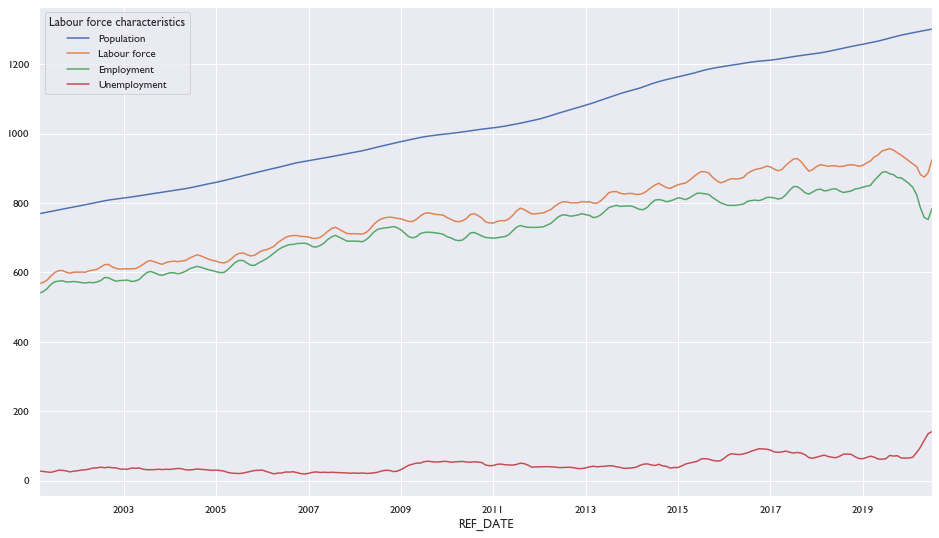

In [37]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line')

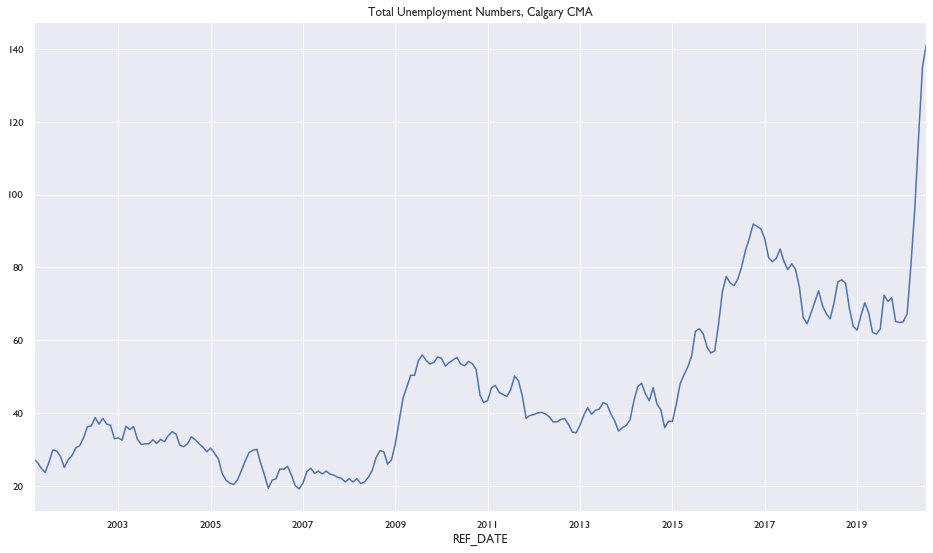

In [38]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')

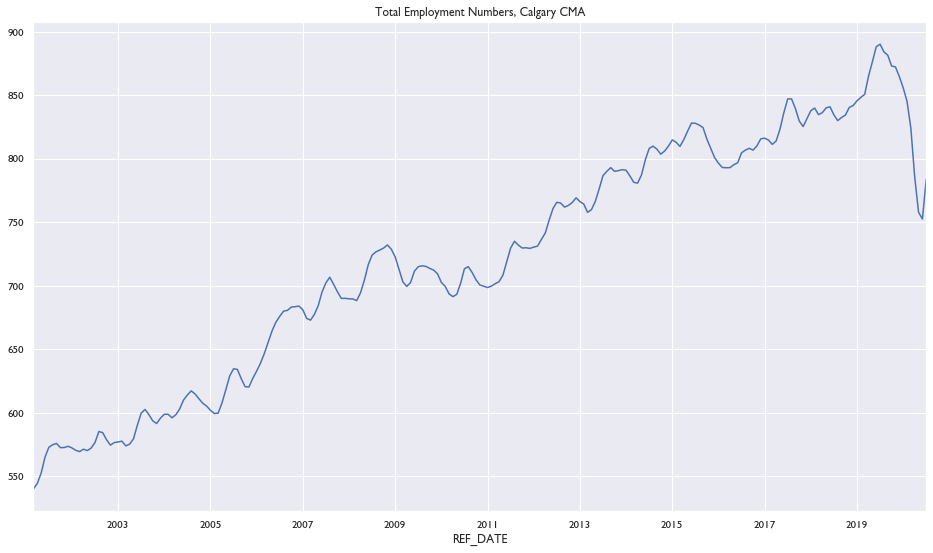

In [39]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')

In [40]:
cal_rates = cal_est[(cal_est['UOM']=='Percentage') & (cal_est['Data type']=='Unadjusted')]

In [41]:
cal_rate_pivot= cal_rates.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')

In [42]:
cal_rate_pivot

Labour force characteristics,Unemployment rate,Participation rate,Employment rate
REF_DATE,,,
2001-03-01,4.8,73.8,70.2
2001-04-01,4.6,74.0,70.6
2001-05-01,4.3,74.7,71.4
2001-06-01,4.0,75.9,72.9
2001-07-01,4.4,77.1,73.7
...,...,...,...
2020-03-01,8.9,70.0,63.7
2020-04-01,10.9,68.1,60.7
2020-05-01,13.3,67.4,58.4


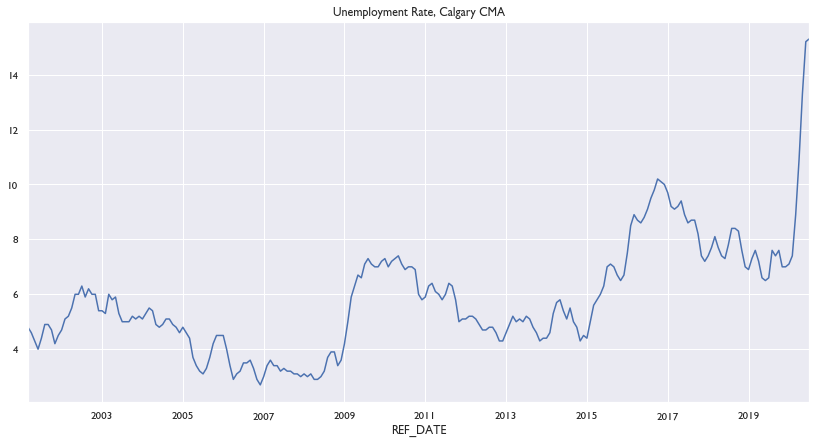

In [43]:
cal_rate_pivot['Unemployment rate'].plot(figsize=(14,7), title='Unemployment Rate, Calgary CMA')

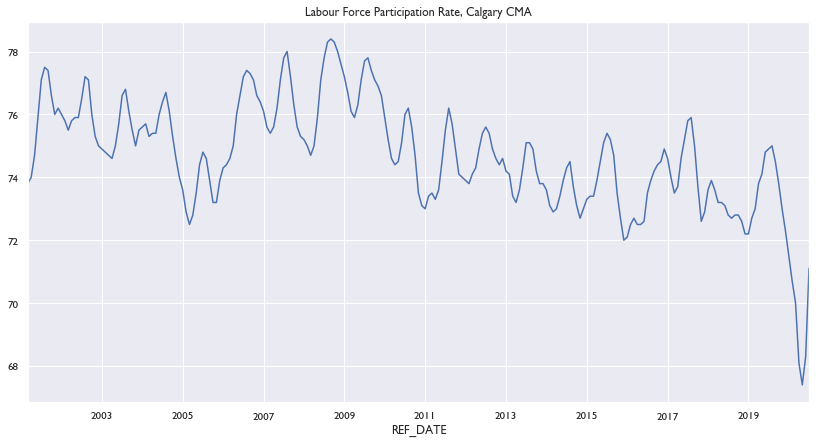

In [44]:
cal_rate_pivot['Participation rate'].plot(figsize=(14,7), title='Labour Force Participation Rate, Calgary CMA')